In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.5 MB/s eta 0:00:00


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
weather_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Drought_dataset_Chuadanga.csv')
weather_df.head()

,Station,Year,Month,Temperature,Rainfall
0,Chuadanga,1994,1,18.8,9.00
1,Chuadanga,1994,2,24.8,15.44
2,Chuadanga,1994,3,28.9,35.33
3,Chuadanga,1994,4,32.9,47.11
4,Chuadanga,1994,5,34.7,119.11


In [4]:
train_df = weather_df.loc[weather_df['Year'] <= 2016]
train_df = train_df[train_df['Station']=='Chuadanga']
train_df.drop(columns=['Station', 'Month', 'Temperature'], axis=1, inplace=True)
train = train_df['Rainfall']
test_df = weather_df.loc[weather_df['Year'] >= 2017]
test_df = test_df[test_df['Station']=='Chuadanga']
test_df.drop(columns=['Station', 'Month', 'Temperature'], axis=1, inplace=True)
test = test_df['Rainfall']

In [5]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Rainfall/Temperture")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [6]:
# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

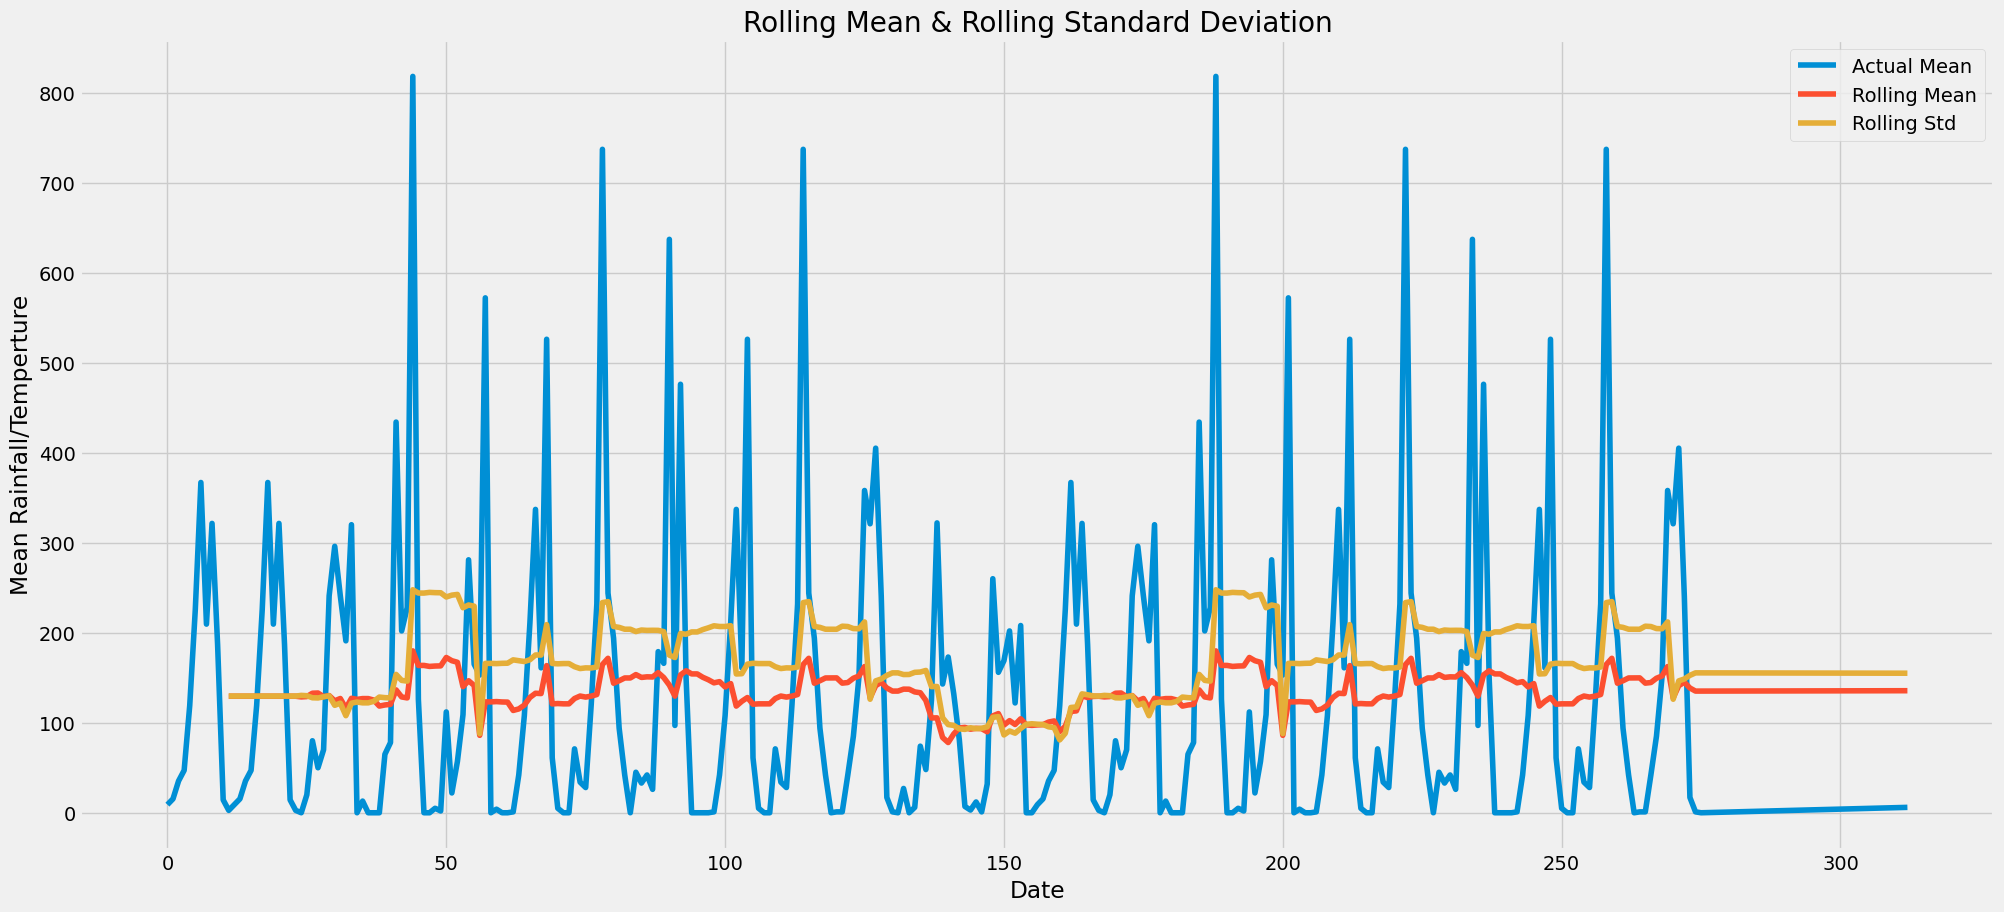

Test statistic:  -3.471544436940079
Critical Values: {'1%': -3.4554613060274972, '5%': -2.8725931472675046, '10%': -2.5726600403359887}


In [7]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(train_df.Rainfall)
perform_dickey_fuller_test(train_df.Rainfall)

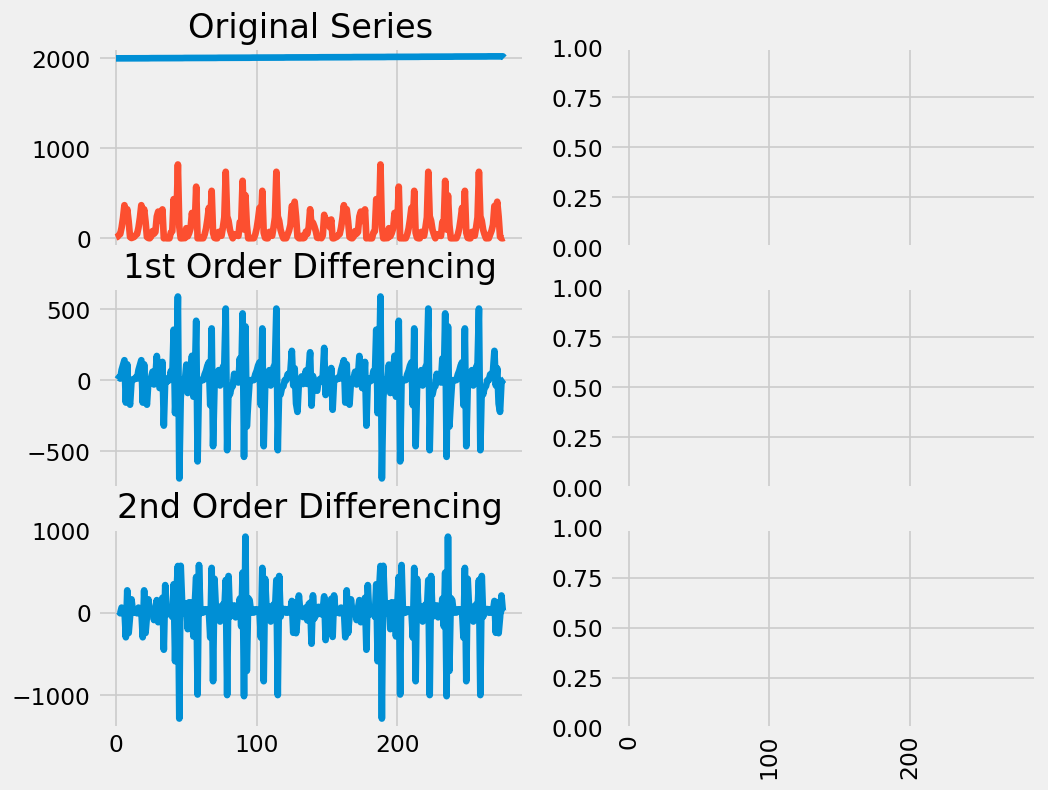

In [8]:
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_df.values); 
axes[0, 0].set_title('Original Series')

# 1st Differencing
axes[1, 0].plot(train_df.Rainfall.diff().values); 
axes[1, 0].set_title('1st Order Differencing')

# 2nd Differencing
axes[2, 0].plot(train_df.Rainfall.diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')

plt.xticks(rotation='vertical')
plt.show()

In [9]:
stepwise_fit = auto_arima(train, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3566.072, Time=1.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3619.783, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3585.979, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3595.218, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3755.942, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3579.332, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3585.644, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3546.269, Time=0.69 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3512.365, Time=0.60 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3580.257, Time=0.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3488.796, Time=0.74 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=3550.923, Time=0.10 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3483.807, Time=0.74 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=3529.379, Time=0.35 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

In [10]:
val_pred = stepwise_fit.predict(len(test))
print(val_pred)
plt.show()

277      9.586917
278     96.297126
279    163.508297
280    213.575581
281    242.572659
282    242.448811
283    210.595252
284    163.141372
285    113.079049
286     72.724270
287     51.952024
288     54.662590
289     77.566743
290    112.827822
291    150.208097
292    179.775623
293    194.575520
294    192.202642
295    174.910282
296    148.600487
297    120.962473
298     99.296119
299     88.651145
300     90.737844
301    103.800757
302    123.403174
303    143.835006
304    159.716116
305    167.360262
306    165.569969
307    155.709905
308    141.108282
309    126.005958
310    114.369088
311    108.886284
312    110.392923
313    117.831225
314    128.705336
315    139.866092
316    148.390423
317    152.318187
318    151.068869
319    145.460562
320    137.364270
321    129.118003
322    122.875610
323    120.065523
dtype: float64


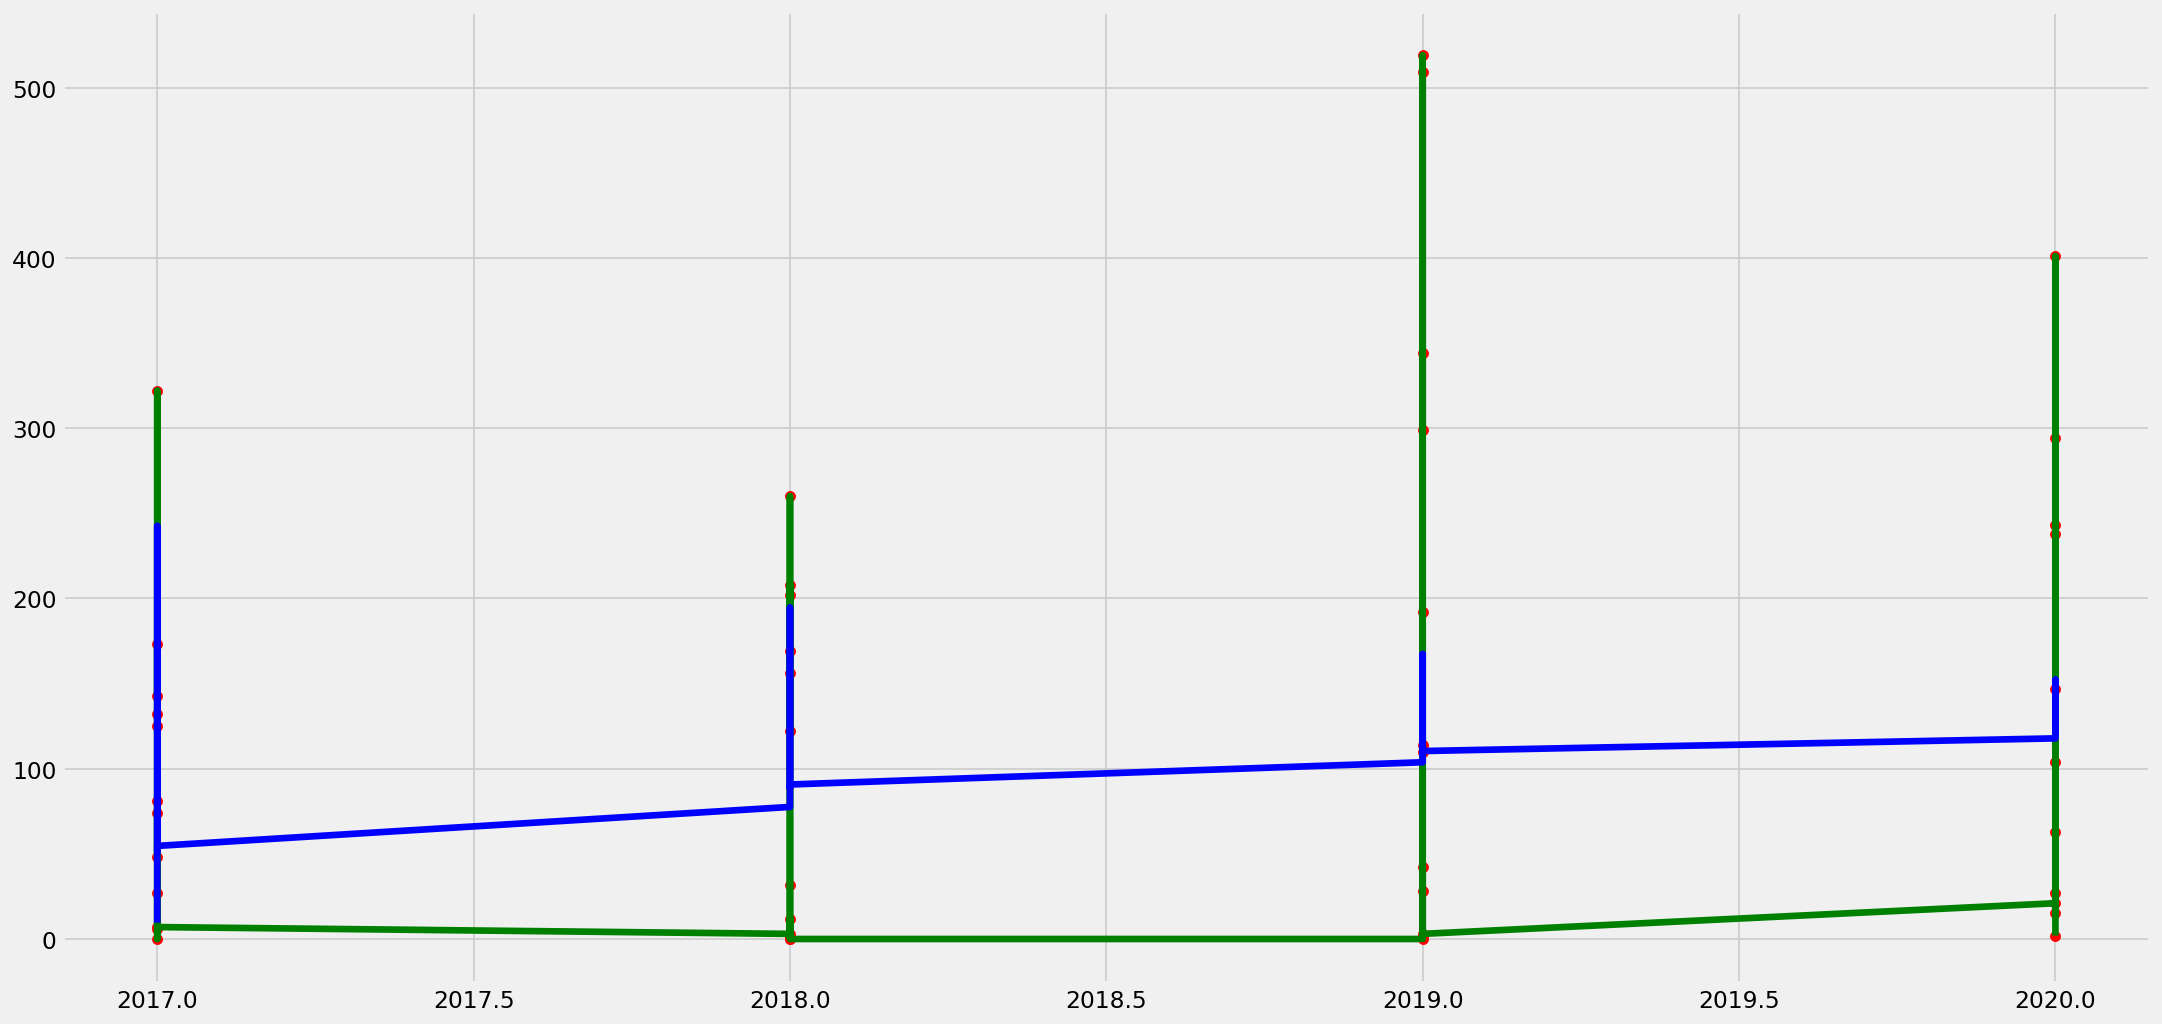

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(test_df['Year'],test,color='red')
plt.plot(test_df['Year'],test,color='green')
plt.plot(test_df['Year'],val_pred,color='blue')

In [12]:
Y_exp_pred = stepwise_fit.predict(len(test)+120)
df1 = pd.DataFrame({'Predicted Rainfall': Y_exp_pred})  
df1[df1['Predicted Rainfall']>=0]
print(df1)

     Predicted Rainfall
277            9.586917
278           96.297126
279          163.508297
280          213.575581
281          242.572659
..                  ...
439          133.827753
440          133.806544
441          133.787978
442          133.776621
443          133.774730

[167 rows x 1 columns]


In [13]:
train_df2 = weather_df.loc[weather_df['Year'] <= 2016]
train_df2 = train_df2[train_df2['Station']=='Chuadanga']
train_df2.drop(columns=['Station', 'Month', 'Rainfall'], axis=1, inplace=True)
train2 = train_df2['Temperature']
test_df2 = weather_df.loc[weather_df['Year'] >= 2017]
test_df2 = test_df2[test_df2['Station']=='Chuadanga']
test_df2.drop(columns=['Station', 'Month', 'Rainfall'], axis=1, inplace=True)
test2 = test_df2['Temperature']

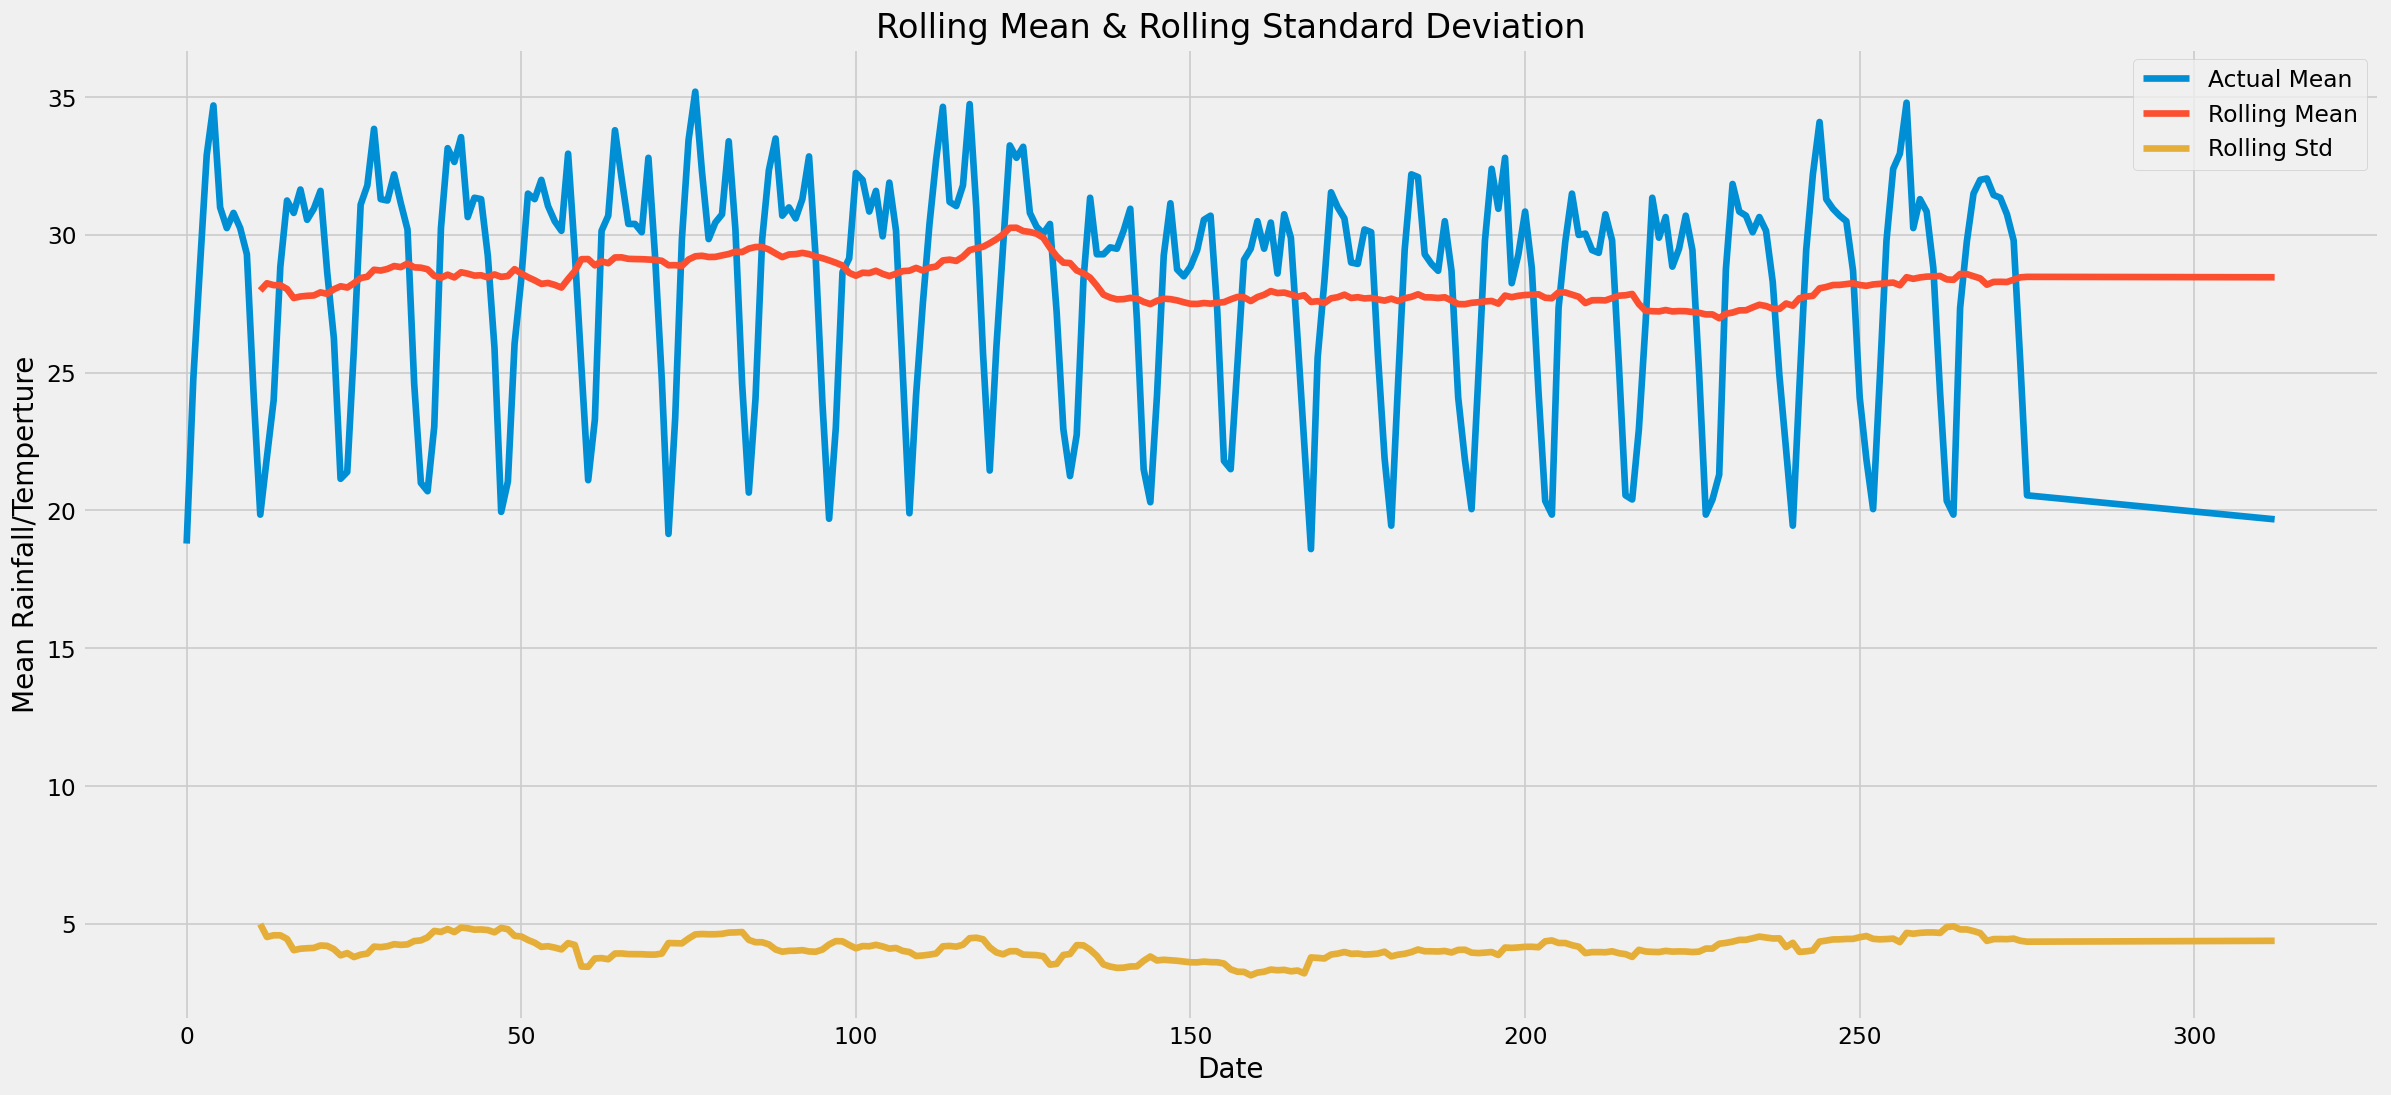

Test statistic:  -2.481202743401609
Critical Values: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


In [14]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(train_df2.Temperature)
perform_dickey_fuller_test(train_df2.Temperature)

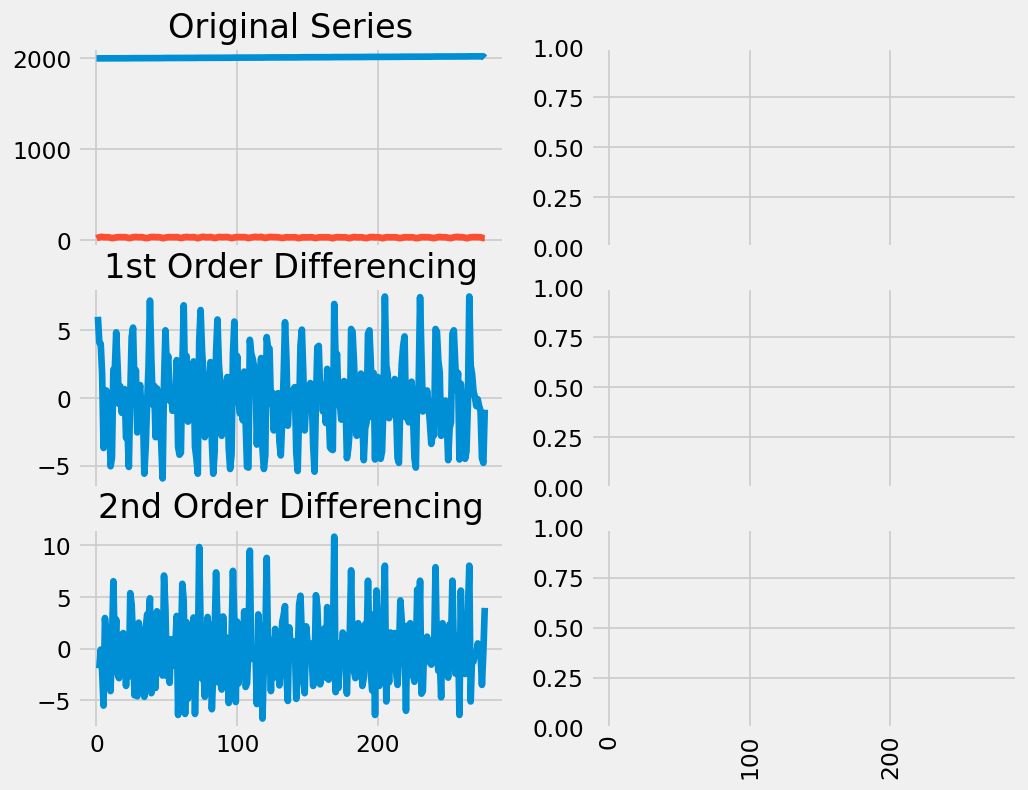

In [15]:
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_df2.values); 
axes[0, 0].set_title('Original Series')

# 1st Differencing
axes[1, 0].plot(train_df2.Temperature.diff().values); 
axes[1, 0].set_title('1st Order Differencing')

# 2nd Differencing
axes[2, 0].plot(train_df2.Temperature.diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')

plt.xticks(rotation='vertical')
plt.show()

In [16]:
stepwise_fit2 = auto_arima(train2, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1226.417, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1568.586, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1369.607, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1370.080, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2644.897, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1257.368, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1233.147, Time=0.63 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1227.942, Time=0.71 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1226.319, Time=0.48 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1232.542, Time=0.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1228.234, Time=0.67 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, T

In [17]:
val_pred2 = stepwise_fit2.predict(len(test2))
print(val_pred2)
plt.show()

277    23.081339
278    27.036946
279    28.815534
280    28.616608
281    28.094177
282    28.056390
283    28.192849
284    28.227307
285    28.196008
286    28.181038
287    28.186969
288    28.192118
289    28.191403
290    28.189866
291    28.189790
292    28.190198
293    28.190291
294    28.190195
295    28.190153
296    28.190172
297    28.190187
298    28.190184
299    28.190180
300    28.190180
301    28.190181
302    28.190181
303    28.190181
304    28.190181
305    28.190181
306    28.190181
307    28.190181
308    28.190181
309    28.190181
310    28.190181
311    28.190181
312    28.190181
313    28.190181
314    28.190181
315    28.190181
316    28.190181
317    28.190181
318    28.190181
319    28.190181
320    28.190181
321    28.190181
322    28.190181
323    28.190181
dtype: float64


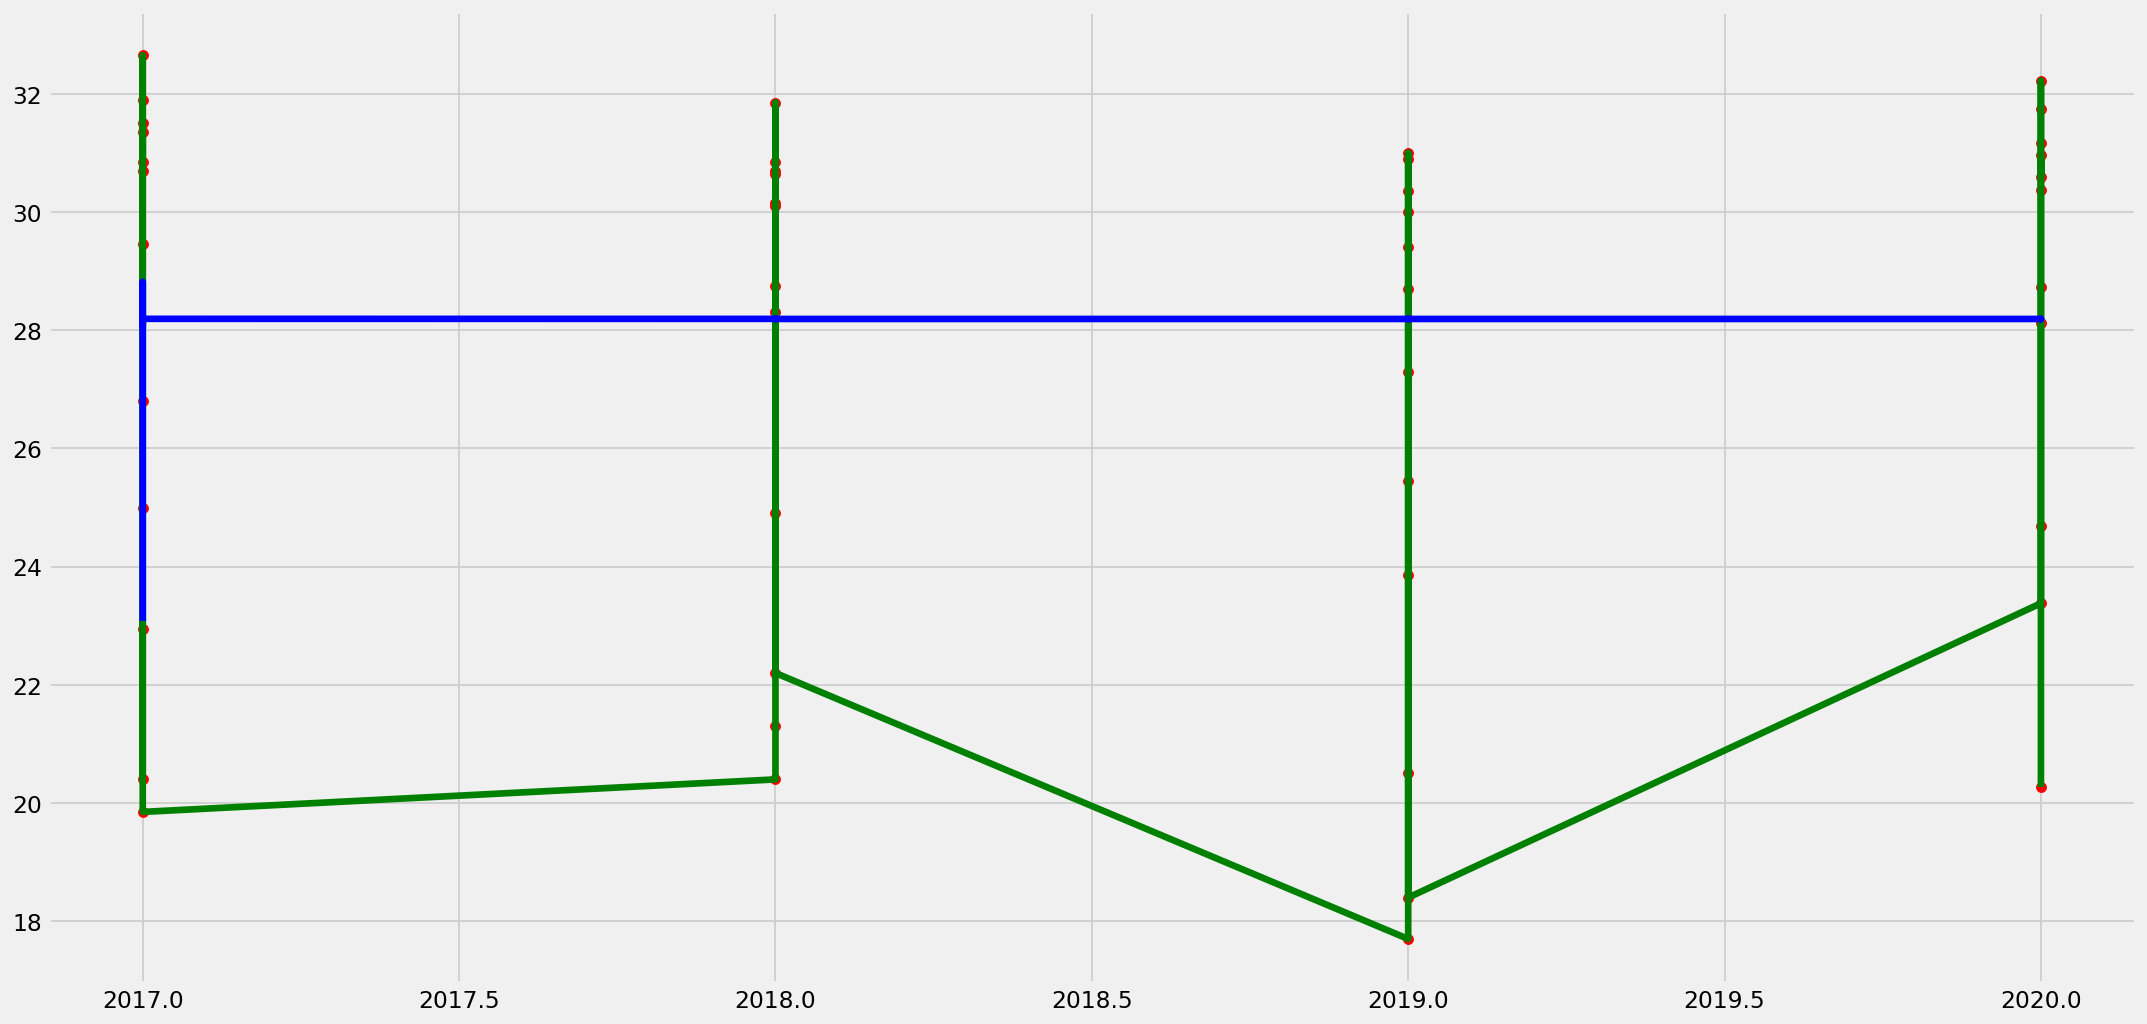

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(test_df2['Year'],test2,color='red')
plt.plot(test_df2['Year'],test2,color='green')
plt.plot(test_df2['Year'],val_pred2,color='blue')

In [19]:
Y_exp_pred2 = stepwise_fit2.predict(len(test2)+120)
df2 = pd.DataFrame({'Predicted Temperature': Y_exp_pred2})  
df2[df2['Predicted Temperature']>=0]
print(df2)

     Predicted Temperature
277              23.081339
278              27.036946
279              28.815534
280              28.616608
281              28.094177
..                     ...
439              28.190181
440              28.190181
441              28.190181
442              28.190181
443              28.190181

[167 rows x 1 columns]


In [20]:
avg_Y_exp_pred = (Y_exp_pred[360]+Y_exp_pred[361]+Y_exp_pred[362]+Y_exp_pred[363]+Y_exp_pred[364]+Y_exp_pred[365]+Y_exp_pred[366]+Y_exp_pred[367]+Y_exp_pred[368]+Y_exp_pred[369]+Y_exp_pred[370]+Y_exp_pred[371]+Y_exp_pred[372]+Y_exp_pred[373]+Y_exp_pred[374]+Y_exp_pred[375]+Y_exp_pred[376]+Y_exp_pred[377]+Y_exp_pred[378]+Y_exp_pred[379]+Y_exp_pred[380]+Y_exp_pred[381]+Y_exp_pred[382]+Y_exp_pred[383]+Y_exp_pred[384]+Y_exp_pred[385]+Y_exp_pred[386]+Y_exp_pred[387]+Y_exp_pred[388]+Y_exp_pred[389]+Y_exp_pred[390]+Y_exp_pred[391]+Y_exp_pred[392]+Y_exp_pred[393]+Y_exp_pred[394]+Y_exp_pred[395]+Y_exp_pred[396]+Y_exp_pred[397]+Y_exp_pred[398]+Y_exp_pred[399]+Y_exp_pred[400]+Y_exp_pred[401]+Y_exp_pred[402]+Y_exp_pred[403]+Y_exp_pred[404]+Y_exp_pred[405]+Y_exp_pred[406]+Y_exp_pred[407]+Y_exp_pred[408]+Y_exp_pred[409]+Y_exp_pred[410]+Y_exp_pred[411]+Y_exp_pred[412]+Y_exp_pred[413]+Y_exp_pred[414]+Y_exp_pred[415]+Y_exp_pred[416]+Y_exp_pred[417]+Y_exp_pred[418]+Y_exp_pred[419]+Y_exp_pred[420]+Y_exp_pred[421]+Y_exp_pred[422]+Y_exp_pred[423]+Y_exp_pred[424]+Y_exp_pred[425]+Y_exp_pred[426]+Y_exp_pred[427]+Y_exp_pred[428]+Y_exp_pred[429]+Y_exp_pred[430]+Y_exp_pred[431]+Y_exp_pred[432]+Y_exp_pred[433]+Y_exp_pred[434]+Y_exp_pred[435]+Y_exp_pred[436]+Y_exp_pred[437]+Y_exp_pred[438]+Y_exp_pred[439]+Y_exp_pred[440]+Y_exp_pred[441]+Y_exp_pred[442]+Y_exp_pred[443])/84                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
avg_Y_val = (val_pred[277]+val_pred[278]+val_pred[279]+val_pred[280]+val_pred[281]+val_pred[282]+val_pred[283]+val_pred[284]+val_pred[285]+val_pred[286]+val_pred[287]+val_pred[288]+val_pred[289]+val_pred[290]+val_pred[291]+val_pred[292]+val_pred[293]+val_pred[294]+val_pred[295]+val_pred[296]+val_pred[297]+val_pred[298]+val_pred[299]+val_pred[300]+val_pred[301]+val_pred[302]+val_pred[303]+val_pred[304]+val_pred[305]+val_pred[306]+val_pred[307]+val_pred[308]+val_pred[309]+val_pred[310]+val_pred[311]+val_pred[312]+val_pred[313]+val_pred[314]+val_pred[315]+val_pred[316]+val_pred[317]+val_pred[318]+val_pred[319]+val_pred[320]+val_pred[321]+val_pred[322]+val_pred[323])/47
avg_Y_exp_pred2 = (Y_exp_pred2[360]+Y_exp_pred2[361]+Y_exp_pred2[362]+Y_exp_pred2[363]+Y_exp_pred2[364]+Y_exp_pred2[365]+Y_exp_pred2[366]+Y_exp_pred2[367]+Y_exp_pred2[368]+Y_exp_pred2[369]+Y_exp_pred2[370]+Y_exp_pred2[371]+Y_exp_pred2[372]+Y_exp_pred2[373]+Y_exp_pred2[374]+Y_exp_pred2[375]+Y_exp_pred2[376]+Y_exp_pred2[377]+Y_exp_pred2[378]+Y_exp_pred2[379]+Y_exp_pred2[380]+Y_exp_pred2[381]+Y_exp_pred2[382]+Y_exp_pred2[383]+Y_exp_pred2[384]+Y_exp_pred2[385]+Y_exp_pred2[386]+Y_exp_pred2[387]+Y_exp_pred2[388]+Y_exp_pred2[389]+Y_exp_pred2[390]+Y_exp_pred2[391]+Y_exp_pred2[392]+Y_exp_pred2[393]+Y_exp_pred2[394]+Y_exp_pred2[395]+Y_exp_pred2[396]+Y_exp_pred2[397]+Y_exp_pred2[398]+Y_exp_pred2[399]+Y_exp_pred2[400]+Y_exp_pred2[401]+Y_exp_pred2[402]+Y_exp_pred2[403]+Y_exp_pred2[404]+Y_exp_pred2[405]+Y_exp_pred2[406]+Y_exp_pred2[407]+Y_exp_pred2[408]+Y_exp_pred2[409]+Y_exp_pred2[410]+Y_exp_pred2[411]+Y_exp_pred2[412]+Y_exp_pred2[413]+Y_exp_pred2[414]+Y_exp_pred2[415]+Y_exp_pred2[416]+Y_exp_pred2[417]+Y_exp_pred2[418]+Y_exp_pred2[419]+Y_exp_pred2[420]+Y_exp_pred2[421]+Y_exp_pred2[422]+Y_exp_pred2[423]+Y_exp_pred2[424]+Y_exp_pred2[425]+Y_exp_pred2[426]+Y_exp_pred2[427]+Y_exp_pred2[428]+Y_exp_pred2[429]+Y_exp_pred2[430]+Y_exp_pred2[431]+Y_exp_pred2[432]+Y_exp_pred2[433]+Y_exp_pred2[434]+Y_exp_pred2[435]+Y_exp_pred2[436]+Y_exp_pred2[437]+Y_exp_pred2[438]+Y_exp_pred2[439]+Y_exp_pred2[440]+Y_exp_pred2[441]+Y_exp_pred2[442]+Y_exp_pred2[443])/84
avg_Y_val2 = (val_pred2[277]+val_pred2[278]+val_pred2[279]+val_pred2[280]+val_pred2[281]+val_pred2[282]+val_pred2[283]+val_pred2[284]+val_pred2[285]+val_pred2[286]+val_pred2[287]+val_pred2[288]+val_pred2[289]+val_pred2[290]+val_pred2[291]+val_pred2[292]+val_pred2[293]+val_pred2[294]+val_pred2[295]+val_pred2[296]+val_pred2[297]+val_pred2[298]+val_pred2[299]+val_pred2[300]+val_pred2[301]+val_pred2[302]+val_pred2[303]+val_pred2[304]+val_pred2[305]+val_pred2[306]+val_pred2[307]+val_pred2[308]+val_pred2[309]+val_pred2[310]+val_pred2[311]+val_pred2[312]+val_pred2[313]+val_pred2[314]+val_pred2[315]+val_pred2[316]+val_pred2[317]+val_pred2[318]+val_pred2[319]+val_pred2[320]+val_pred2[321]+val_pred2[322]+val_pred2[323])/47
drought_index = (avg_Y_val / avg_Y_exp_pred) * ((avg_Y_val2 / avg_Y_exp_pred2)**0.5)
print(drought_index)

1.01201259925146


In [21]:
drought_2024 = (avg_Y_val / ((Y_exp_pred[360]+Y_exp_pred[361]+Y_exp_pred[362]+Y_exp_pred[363]+Y_exp_pred[364]+Y_exp_pred[365]+Y_exp_pred[366]+Y_exp_pred[367]+Y_exp_pred[368]+Y_exp_pred[369]+Y_exp_pred[370]+Y_exp_pred[371])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[360]+Y_exp_pred2[361]+Y_exp_pred2[362]+Y_exp_pred2[363]+Y_exp_pred2[364]+Y_exp_pred2[365]+Y_exp_pred2[366]+Y_exp_pred2[367]+Y_exp_pred2[368]+Y_exp_pred2[369]+Y_exp_pred2[370]+Y_exp_pred2[371])/12))**0.5)
drought_2025 = (avg_Y_val / ((Y_exp_pred[372]+Y_exp_pred[373]+Y_exp_pred[374]+Y_exp_pred[375]+Y_exp_pred[376]+Y_exp_pred[377]+Y_exp_pred[378]+Y_exp_pred[379]+Y_exp_pred[380]+Y_exp_pred[381]+Y_exp_pred[382]+Y_exp_pred[383])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[372]+Y_exp_pred2[373]+Y_exp_pred2[374]+Y_exp_pred2[375]+Y_exp_pred2[376]+Y_exp_pred2[377]+Y_exp_pred2[378]+Y_exp_pred2[379]+Y_exp_pred2[380]+Y_exp_pred2[381]+Y_exp_pred2[382]+Y_exp_pred2[383])/12))**0.5)
drought_2026 = (avg_Y_val / ((Y_exp_pred[384]+Y_exp_pred[385]+Y_exp_pred[386]+Y_exp_pred[387]+Y_exp_pred[388]+Y_exp_pred[389]+Y_exp_pred[390]+Y_exp_pred[391]+Y_exp_pred[392]+Y_exp_pred[393]+Y_exp_pred[394]+Y_exp_pred[395])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[384]+Y_exp_pred2[385]+Y_exp_pred2[386]+Y_exp_pred2[387]+Y_exp_pred2[388]+Y_exp_pred2[389]+Y_exp_pred2[390]+Y_exp_pred2[391]+Y_exp_pred2[392]+Y_exp_pred2[393]+Y_exp_pred2[394]+Y_exp_pred2[395])/12))**0.5)
drought_2027 = (avg_Y_val / ((Y_exp_pred[396]+Y_exp_pred[397]+Y_exp_pred[398]+Y_exp_pred[399]+Y_exp_pred[400]+Y_exp_pred[401]+Y_exp_pred[402]+Y_exp_pred[403]+Y_exp_pred[404]+Y_exp_pred[405]+Y_exp_pred[406]+Y_exp_pred[407])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[396]+Y_exp_pred2[397]+Y_exp_pred2[398]+Y_exp_pred2[399]+Y_exp_pred2[400]+Y_exp_pred2[401]+Y_exp_pred2[402]+Y_exp_pred2[403]+Y_exp_pred2[404]+Y_exp_pred2[405]+Y_exp_pred2[406]+Y_exp_pred2[407])/12))**0.5)
drought_2028 = (avg_Y_val / ((Y_exp_pred[408]+Y_exp_pred[409]+Y_exp_pred[410]+Y_exp_pred[411]+Y_exp_pred[412]+Y_exp_pred[413]+Y_exp_pred[414]+Y_exp_pred[415]+Y_exp_pred[416]+Y_exp_pred[417]+Y_exp_pred[418]+Y_exp_pred[419])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[408]+Y_exp_pred2[409]+Y_exp_pred2[410]+Y_exp_pred2[411]+Y_exp_pred2[412]+Y_exp_pred2[413]+Y_exp_pred2[414]+Y_exp_pred2[415]+Y_exp_pred2[416]+Y_exp_pred2[417]+Y_exp_pred2[418]+Y_exp_pred2[419])/12))**0.5)
drought_2029 = (avg_Y_val / ((Y_exp_pred[420]+Y_exp_pred[421]+Y_exp_pred[422]+Y_exp_pred[423]+Y_exp_pred[424]+Y_exp_pred[425]+Y_exp_pred[426]+Y_exp_pred[427]+Y_exp_pred[428]+Y_exp_pred[429]+Y_exp_pred[430]+Y_exp_pred[431])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[420]+Y_exp_pred2[421]+Y_exp_pred2[422]+Y_exp_pred2[423]+Y_exp_pred2[424]+Y_exp_pred2[425]+Y_exp_pred2[426]+Y_exp_pred2[427]+Y_exp_pred2[428]+Y_exp_pred2[429]+Y_exp_pred2[430]+Y_exp_pred2[431])/12))**0.5)
drought_2030 = (avg_Y_val / ((Y_exp_pred[432]+Y_exp_pred[433]+Y_exp_pred[434]+Y_exp_pred[435]+Y_exp_pred[436]+Y_exp_pred[437]+Y_exp_pred[438]+Y_exp_pred[439]+Y_exp_pred[440]+Y_exp_pred[441]+Y_exp_pred[442]+Y_exp_pred[443])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[432]+Y_exp_pred2[433]+Y_exp_pred2[434]+Y_exp_pred2[435]+Y_exp_pred2[436]+Y_exp_pred2[437]+Y_exp_pred2[438]+Y_exp_pred2[439]+Y_exp_pred2[440]+Y_exp_pred2[441]+Y_exp_pred2[442]+Y_exp_pred2[443])/12))**0.5)
print("Drought possibility in 2024:", drought_2024)
print("Drought possibility in 2025:", drought_2025)
print("Drought possibility in 2026:", drought_2026)
print("Drought possibility in 2027:", drought_2027)
print("Drought possibility in 2028:", drought_2028)
print("Drought possibility in 2029:", drought_2029)
print("Drought possibility in 2030:", drought_2030)

Drought possibility in 2024: 1.0120178482598767
Drought possibility in 2025: 1.0120033263103914
Drought possibility in 2026: 1.0120038982703194
Drought possibility in 2027: 1.012008884281934
Drought possibility in 2028: 1.0120141742457065
Drought possibility in 2029: 1.0120184720179608
Drought possibility in 2030: 1.0120215916911017


Text(0.5, 1.0, 'Drought index')

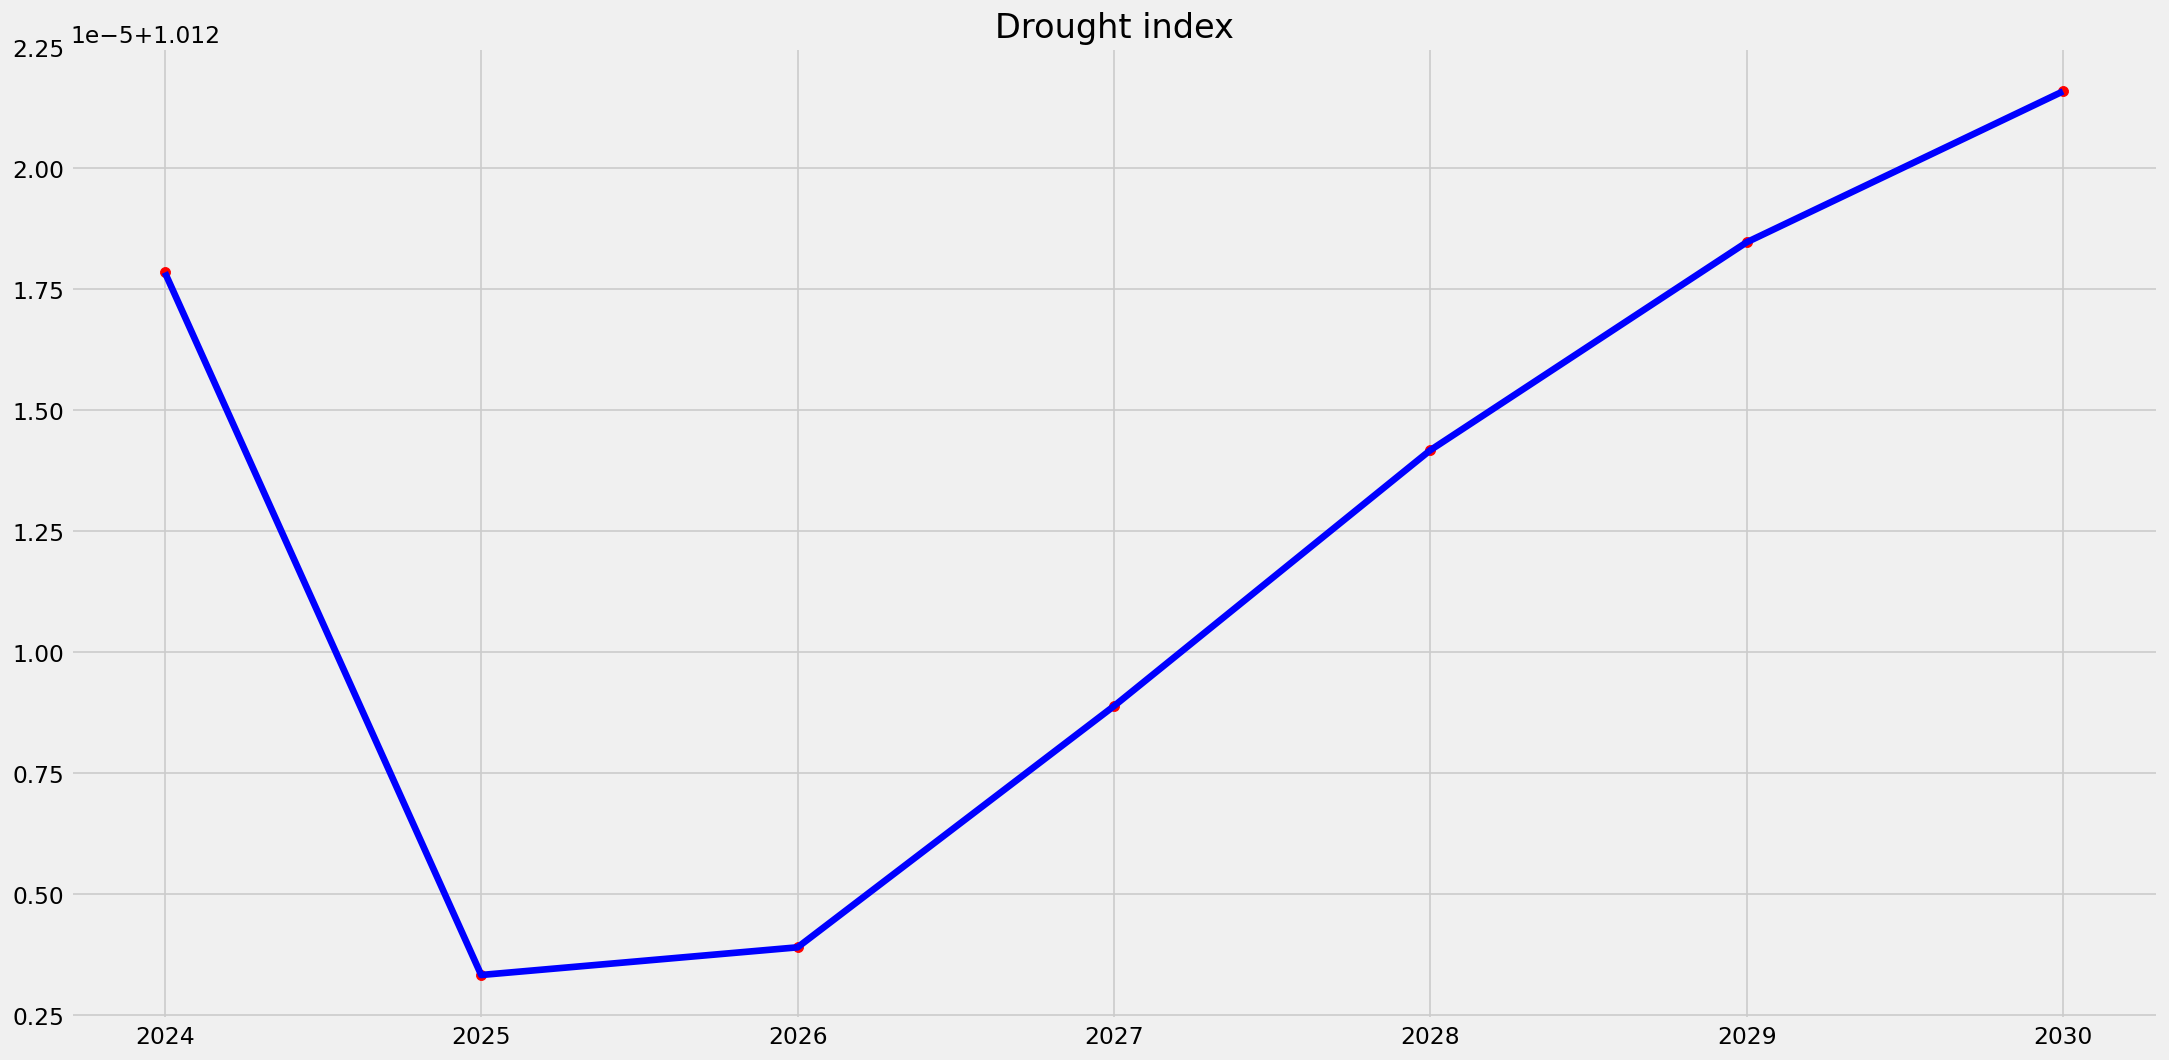

In [24]:
drought = [1.0120178482598767,  1.0120033263103914, 1.0120038982703194, 1.012008884281934, 1.0120141742457065, 1.0120184720179608, 1.0120215916911017]
year = ['2024','2025','2026','2027','2028', '2029', '2030']
plt.figure(figsize=(20,10))
plt.scatter(year,drought,color='red')
plt.plot(year,drought,color='blue')
plt.title('Drought index')